In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pandas as pd
from keras.utils import np_utils

DATADIR = "/home/reinaldo/Documentos/PetImages/database"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

Using TensorFlow backend.


<Figure size 640x480 with 1 Axes>

In [2]:
print(img_array)

[[138 136 133 ... 150 148 147]
 [138 135 131 ... 143 141 140]
 [138 134 129 ... 139 137 136]
 ...
 [ 50  89 172 ...  75  81  85]
 [ 54  58 142 ...  51  65  74]
 [ 42  26 109 ... 137 122 102]]


In [3]:
print(img_array.shape)

(500, 500)


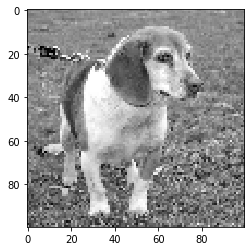

(100, 100)


In [4]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()
print(new_array.shape)

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))


100%|██████████| 11/11 [00:00<00:00, 842.43it/s]

21


In [6]:
import random

random.shuffle(training_data)


In [7]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
0
1
0
1
1
1
0


In [8]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[129]
   [129]
   [133]
   ...
   [133]
   [140]
   [139]]

  [[134]
   [141]
   [156]
   ...
   [132]
   [127]
   [127]]

  [[118]
   [119]
   [118]
   ...
   [133]
   [132]
   [141]]

  ...

  [[121]
   [ 83]
   [ 83]
   ...
   [112]
   [153]
   [160]]

  [[ 35]
   [ 60]
   [ 84]
   ...
   [151]
   [131]
   [121]]

  [[172]
   [ 54]
   [ 85]
   ...
   [207]
   [122]
   [ 75]]]]


In [9]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [10]:
#We can always load it in to our current script, or a totally new one by doing:

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [11]:
#(X_train, X_test), (y_train, y_test) = (X[0:200],X[201:]), (y[0:200],y[201:])
print(y)

[0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0]


In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
y = np_utils.to_categorical(y,2)

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=5, validation_split=0.3)


W0725 15:02:38.054441 139633084847744 deprecation.py:506] From /home/reinaldo/masters/ai/.venv/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 14 samples, validate on 7 samples
Epoch 1/5
14/14 [==============================] - 1s 73ms/sample - loss: 0.6962 - acc: 0.5000 - val_loss: 4.2857 - val_acc: 0.5714
Epoch 2/5
14/14 [==============================] - 0s 15ms/sample - loss: 4.8982 - acc: 0.5000 - val_loss: 0.8534 - val_acc: 0.2857
Epoch 3/5
14/14 [==============================] - 0s 17ms/sample - loss: 0.4222 - acc: 0.9286 - val_loss: 3.5607 - val_acc: 0.4286
Epoch 4/5
14/14 [==============================] - 0s 18ms/sample - loss: 2.6022 - acc: 0.5000 - val_loss: 2.3164 - val_acc: 0.4286
Epoch 5/5
14/14 [==============================] - 0s 18ms/sample - loss: 1.5080 - acc: 0.5000 - val_loss: 0.9978 - val_acc: 0.4286


In [13]:
#model = Sequential()

#model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:]))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

#model.add(Dense(64))

#model.add(Dense(1))
#model.add(Activation('sigmoid'))

#model.compile(loss='binary_crossentropy',
#              optimizer='adam',
 #             metrics=['accuracy'])
#
#model.fit(X, y, batch_size=40, epochs=5, validation_split=0.5)